線形回帰モデルや木構造を利用したモデル（決定木やランダムフォレストなど）は一般的にその結果の解釈が容易な機械学習モデルです。一方、モデルがより複雑になると、モデルが導き出した値がどのようにして得られたのか、その予測を説明することが難しくなります。例えば、非線形回帰モデルやニューラルネットワーク、勾配ブースティングモデルなどのモデルは、その予測を説明することが難しいため、ブラックボックスモデルと呼ばれています。

モデルの精度の観点からは、ブラックボックスモデルの方が優れていることが多いです。しかし、モデルが予測したものの理由を説明することが困難であるために、モデルに対する信頼性が低下する可能性があります。つまり、一般的にはモデルの精度と解釈性はトレードオフの関係にあります。モデルの精度を維持しながら、モデルの解釈性を向上させることは、機械学習の研究や開発において重要な課題です。

# Partial Dependence Plots　（PDP）

partial dependence plotを用いると特徴量とモデルが予測する目的変数との関係性を可視化することができます。入力の値の変化に対して、モデルがどのように反応するかを表すことができます。線形回帰モデルでは常に線形の関係性が得られますが、非線形回帰モデルでは非線形の関係性が得られることがあります。

勾配ブースティングを例に、モデルの解釈性を向上させる方法を紹介します。勾配ブースティングは、複数の決定木を組み合わせて予測を行うアンサンブル学習の一種です。


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay

In [2]:
# ペンギンデータの読み込みと欠損値の削除
penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)

In [3]:
# One-hotエンコーディングを適用する特徴量
categorical_features = ['species', 'island', 'sex']

# データの前処理とモデル構築のパイプライン
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough'
)

model = make_pipeline(
    preprocessor,
    GradientBoostingRegressor()
)

In [4]:
# データの準備
X = penguins.drop(columns="body_mass_g")
y = penguins["body_mass_g"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20230522, stratify=X["species"])

In [5]:
# モデルの学習
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['species', 'island',
                                                   'sex'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

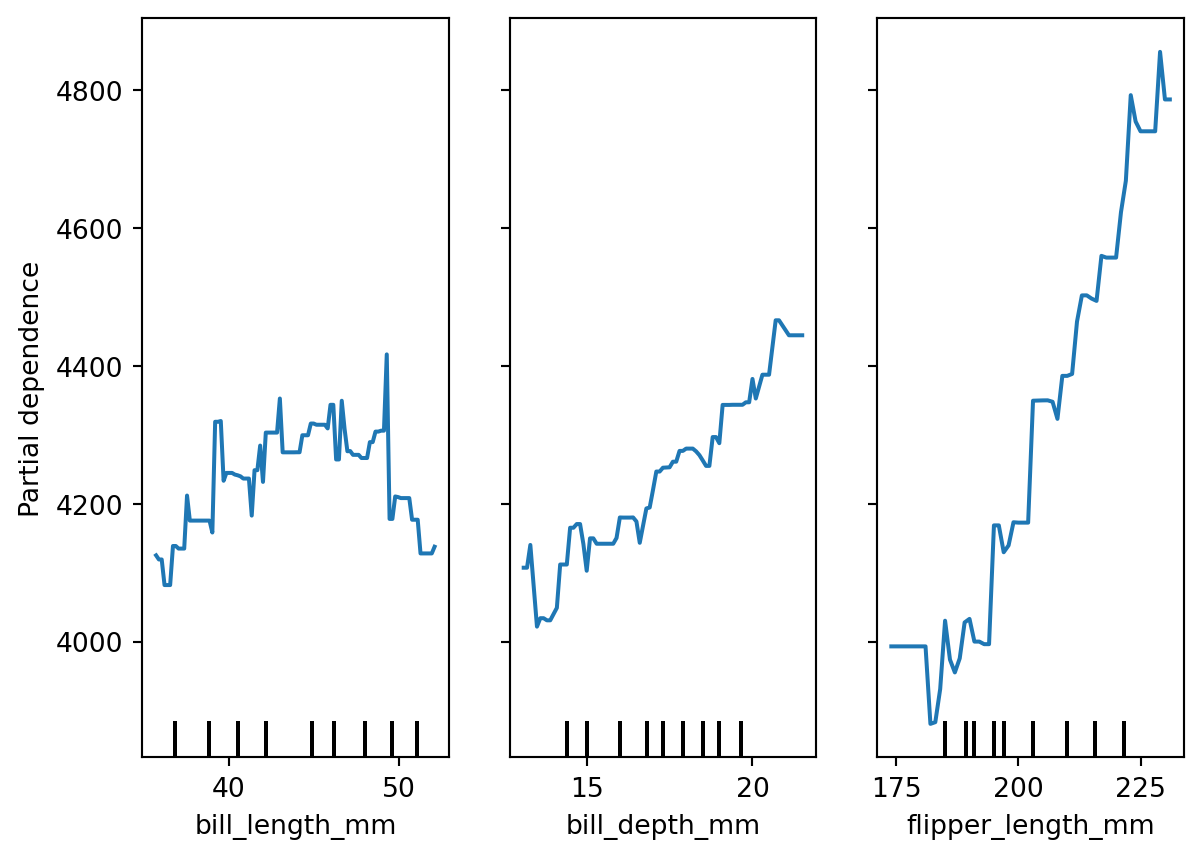

In [6]:
# plot_partial_dependence
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
)

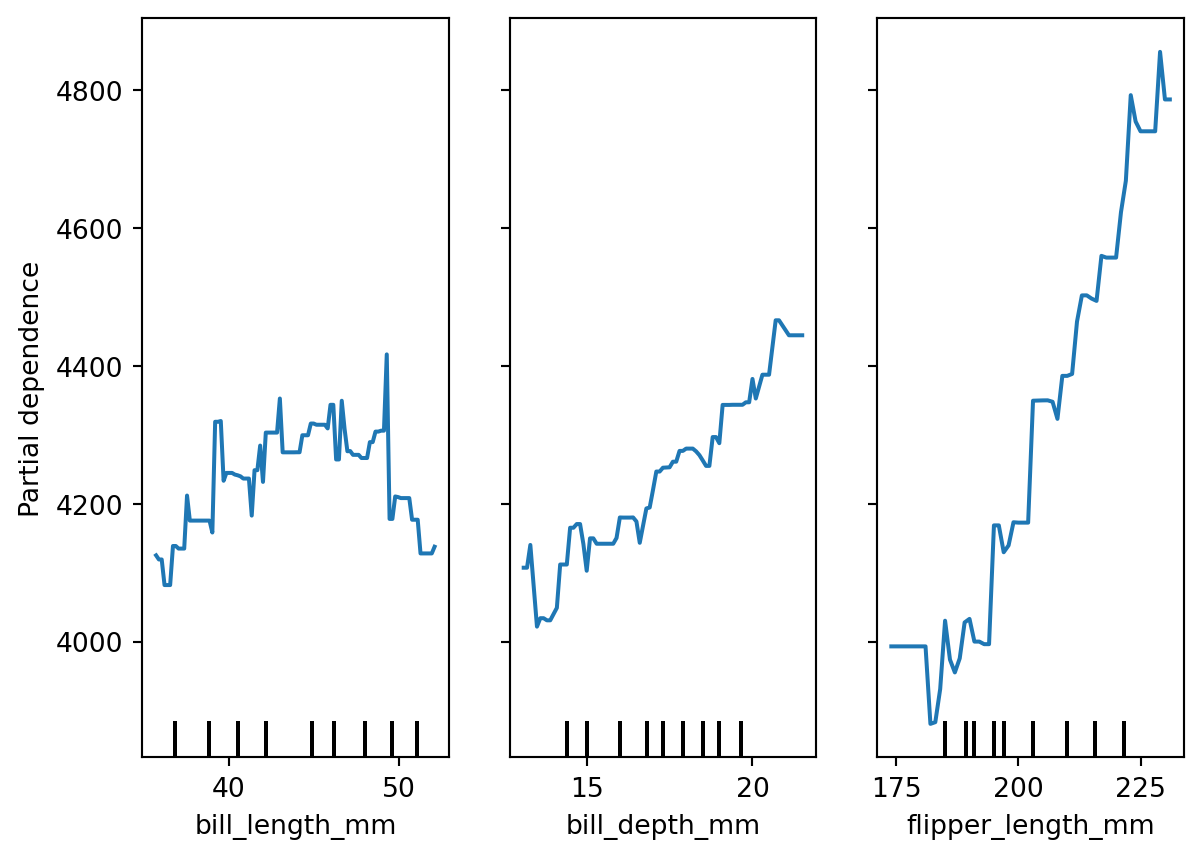

In [7]:
# plot
display.plot()

partial dependence plotのx軸は、特徴量の値の範囲を表しています。x軸の下方に示されるラインはデータの分布を表しています。y軸は、その特徴量の値がモデルの予測に与える影響を表しています。この図から、例えば、flipper_length_mmが200のとき、モデルの予測は約4000gになります。

ペンギンの体重は体の各部位と関係があると考えられ、モデルでもbill_depth_mmやflipper_length_mmの増加が体重の増加に寄与していることを確認できます。一方、partial dependence plotからは、bill_length_mmが体重に寄与していないことを示しています。しかしこの結果は直感的な予測とは異なります。モデルがこのような解釈を行った理由については、学習データの不足やモデルの設計によるものと考えられます。